# Exploratory Data Analysis

## Text Analysis

Now that I have preprocessed my text, I want to look at the text in more detail to inform my modeling process.

In [2]:
import pandas as pd
import numpy as np
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
import re
from collections import Counter

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Load in preprocessed words
import pickle

infile = open('processed_text.pkl','rb')
text_l = pickle.load(infile)
infile.close()

In [741]:
# Number of texts/abstracts
len(text_l)

42977

I want to look at the distribution of lengths of each text.

In [742]:
# Create dictionary of each text/abstract with its corresponding # of terms
lengths = {}
for num, text in enumerate(text_l):
    text_tokenized = word_tokenize(text)
    lengths[num] = len(text_tokenized)

In [743]:
# Descriptive statistics
length_min = min(lengths.values())
length_max = max(lengths.values())
length_range = max(lengths.values()) - min(lengths.values())
length_25, length_median, length_75 = statistics.quantiles(lengths.values())
length_mean = statistics.mean(lengths.values())

print('Minimum: ', length_min)
print('Maximum: ', length_max)
print('Range: ', length_range)
print('Mean: ', length_mean)
print('Median: ', length_median)
print('25th percentile: ', length_25)
print('75th percentile: ', length_75)

Minimum:  1
Maximum:  499
Range:  498
Mean:  51.40447215952719
Median:  50.0
25th percentile:  35.0
75th percentile:  65.0


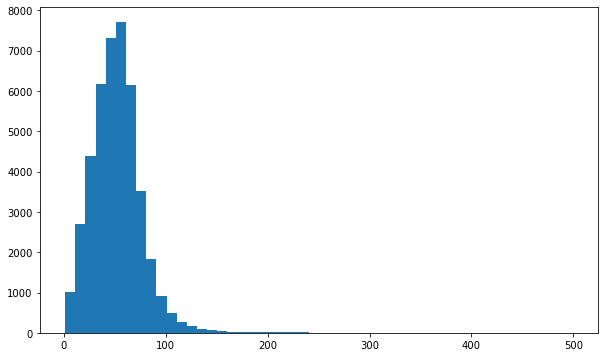

In [744]:
# Plot distribution of lengths: histogram
plt.figure(figsize=(10,6))
plt.hist(list(lengths.values()), bins=50);

It looks like the distribution is slightly skewed to the right.

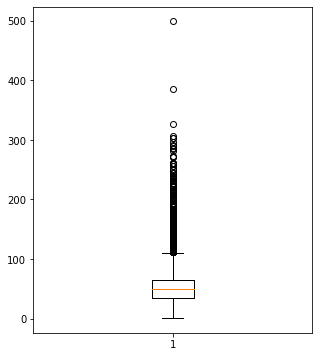

In [745]:
# Boxplot of lengths
lengths_arr = np.array(list(lengths.values()))
plt.figure(figsize=(5,6))
plt.boxplot(lengths_arr);

I want to look more closely at some of the outliers.

In [31]:
# Create functions for counting number of texts with specified number of terms
def num_texts_less(n):
    counter = 0
    for k, v in lengths.items():
        if v < n:
            counter += 1
    return counter

def num_texts_more(n):
    counter = 0
    for k, v in lengths.items():
        if v > n:
            counter += 1
    return counter

In [746]:
# Look at # of texts below 25th percentile
num_texts_less(35)

10380

In [747]:
# Look at # of texts with <10 terms, <5 terms, and 1 term
print('<10 terms: ', num_texts_less(10))
print('<5 terms: ', num_texts_less(5))
print('1 term: ', num_texts_less(2))

<10 terms:  880
<5 terms:  381
1 term:  177


In [748]:
# Look at # of texts above 25th percentile
num_texts_more(64)

10847

In [749]:
# Look at # of texts with >100 terms
num_texts_more(100)

1242

In [761]:
# Look at # of texts with >200 terms
num_texts_more(200)

64

In [762]:
# Look at # of texts with >300 terms
num_texts_more(300)

6

I will not exclude any texts for now. If any issues come up during modeling, I may revisit this and exclude some outliers

I will now look at the frequency distributions of all words and identify which words occur most and least frequently.

In [4]:
# Split text into tokens
all_tokens = []
for text in text_l:
    for word in word_tokenize(text):
        all_tokens.append(word)

In [5]:
# Get count of all tokens
c = Counter(all_tokens)

In [6]:
# Total count of all terms
sum(c.values())

2209210

In [7]:
# Number of unique terms
len(list(c))

48461

In [754]:
# Look at 50 most common terms
for letter, count in c.most_common(50):
    print('%s: %7d' % (letter, count))

patient:   78461
disease:   35888
health:   30137
study:   28068
infection:   28042
case:   27549
care:   20147
risk:   19197
data:   16758
treatment:   16603
respiratory:   15354
time:   13773
virus:   13371
group:   12228
symptom:   11320
level:   11312
system:   11183
rate:   10666
response:   10383
hospital:   10283
number:   10271
mortality:    9959
analysis:    9919
year:    9766
model:    9605
cell:    9494
effect:    9281
country:    9179
factor:    9085
drug:    8907
population:    8878
death:    8462
measure:    8410
control:    8186
test:    8115
transmission:    8046
syndrome:    7942
evidence:    7423
management:    7397
outcome:    7230
world:    7208
people:    7003
strategy:    6981
period:    6967
research:    6891
finding:    6745
review:    6731
impact:    6464
pandemic:    6397
report:    6215


These terms are general and can likely be excluded from the analysis - I will add them to my stop words.

Let's look at the next 50 most common terms.

In [755]:
# Look at top 100 most common terms
for letter, count in c.most_common(100)[50:]:
    print('%s: %7d' % (letter, count))

therapy:    6189
change:    6147
emergency:    6067
protein:    6027
role:    5875
information:    5827
practice:    5826
service:    5637
trial:    5635
community:    5498
activity:    5476
intervention:    5440
child:    5265
participant:    5140
march:    5119
spread:    5104
diagnosis:    5099
individual:    5083
approach:    5075
vaccine:    5066
sample:    5057
support:    4995
development:    4971
cancer:    4953
article:    4856
china:    4852
survey:    4802
lung:    4777
condition:    4774
admission:    4773
outbreak:    4624
center:    4567
antibody:    4552
challenge:    4503
term:    4503
severity:    4489
worker:    4448
characteristic:    4316
difference:    4297
healthcare:    4286
state:    4262
woman:    4191
crisis:    4164
week:    4134
pneumonia:    4131
area:    4081
value:    4068
increase:    4016
resource:    3934
anxiety:    3910


The next 50 words are more interesting and reveal preliminary topics:
- Vaccine
- Anxiety
- Respiratory disease: lung, pneumonia
- Cancer
- Time: March
- Places: China

From this exploration, it seems like a good cut-off for 'max_df' would be **6200**.

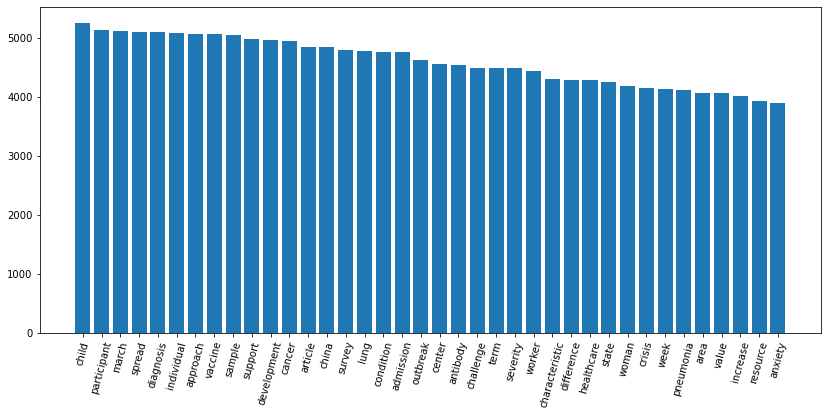

In [9]:
# Plot frequencies of 63rd-100th most common words
plt.figure(figsize=(14,6))
common_terms = [item[0] for item in c.most_common(100)[62:]]
common_cts = [item[1] for item in c.most_common(100)[62:]]
plt.bar(common_terms, common_cts, width=0.8)
plt.xticks(rotation=75)
plt.savefig('term_freq.svg', dpi=100, bbox_inches='tight');

In [764]:
# Descriptive statistics of counts
ct_25, ct_median, ct_75 = statistics.quantiles(c.values())

print('Minimum: ', min(c.values()))
print('Maximum: ', max(c.values()))
print('Range: ', max(c.values()) - min(c.values()))
print('Mean: ', statistics.mean(c.values()))
print('25th percentile: ', ct_25)
print('Median: ', ct_median)
print('75th percentile: ', ct_75)

Minimum:  1
Maximum:  78461
Range:  78460
Mean:  45.58737954231238
25th percentile:  1.0
Median:  2.0
75th percentile:  4.0


The mean is fairly low considering the wide range of frequencies. Let's look at the words with frequencies below the mean. This may also help us determine the 'min_df' parameter.

In [758]:
# Convert Counter to dictionary for further analysis
c_dict = dict(c)

In [759]:
below_mean = [item for item in c.items() if item[1] <= 46]
below_mean = sorted(below_mean, key = lambda x: x[1], reverse=True)
below_mean

[('autoimmunity', 46),
 ('opening', 46),
 ('facilitator', 46),
 ('server', 46),
 ('universal', 46),
 ('philippine', 46),
 ('stringency', 46),
 ('encephalopathy', 46),
 ('eligibility_criteria', 46),
 ('aspartate_aminotransferase', 46),
 ('article_protected_copyright', 46),
 ('mechanical_ventilators', 46),
 ('roc_curve', 46),
 ('nephrology', 46),
 ('seasonality', 46),
 ('connectedness', 46),
 ('formulate', 46),
 ('breastfeeding', 46),
 ('intent', 46),
 ('petct', 46),
 ('gold', 46),
 ('lactate', 46),
 ('express', 46),
 ('chloroquine_cq', 46),
 ('large_vessel_occlusion', 46),
 ('alter', 46),
 ('johns_hopkins', 46),
 ('interacts', 45),
 ('roche', 45),
 ('microscopy', 45),
 ('austria', 45),
 ('virulent', 45),
 ('functioning', 45),
 ('suspect', 45),
 ('mouth', 45),
 ('transporter', 45),
 ('face_coverings', 45),
 ('neck', 45),
 ('receive', 45),
 ('immunomodulators', 45),
 ('pathogenic', 45),
 ('treating', 45),
 ('wage', 45),
 ('congestion', 45),
 ('implantation', 45),
 ('cytotoxicity', 45),
 (

In [771]:
below_35 = [item for item in c.items() if item[1] <= 35]
below_35 = sorted(below_10, key = lambda x: x[1], reverse=True)
below_35

[('jiangsu_province', 35),
 ('relate', 35),
 ('marital_status', 35),
 ('childcare', 35),
 ('page', 35),
 ('binder', 35),
 ('sleep_disturbance', 35),
 ('establishes', 35),
 ('eliminate', 35),
 ('master', 35),
 ('aliards', 35),
 ('reverse_genetics', 35),
 ('progenitor', 35),
 ('reminder', 35),
 ('dollar', 35),
 ('chemiluminescence', 35),
 ('texas', 35),
 ('cognitive_impairment', 35),
 ('convergence', 35),
 ('comprehension', 35),
 ('bronchiectasis', 35),
 ('transcriptome', 35),
 ('judge', 35),
 ('enoxaparin', 35),
 ('decomposition', 35),
 ('excellence', 35),
 ('billion', 35),
 ('solve', 35),
 ('desaturation', 35),
 ('generates', 35),
 ('posttraumatic_stress_disorder', 35),
 ('dissection', 35),
 ('micronutrient', 35),
 ('diabetic', 35),
 ('etiological_agent', 35),
 ('horizon', 35),
 ('circle', 35),
 ('chemokine', 35),
 ('helix', 35),
 ('toxic_shock', 35),
 ('kenya', 35),
 ('scaffold', 35),
 ('react', 35),
 ('egypt', 35),
 ('microbiome', 35),
 ('press', 35),
 ('cxrs', 35),
 ('melanoma', 35)

In [760]:
print('Number of terms with length below the mean length: ', len(below_mean))
print('Percentage of total terms: {}%'.format(len(below_mean)/sum(c.values())*100))

Number of terms with length below the mean length:  45520
Percentage of total terms: 2.0604650531185356%


It looks like a good cut-off for min_df parameter may be **31** as most of the terms with frequencies below this number seem obscure.